<a href="https://colab.research.google.com/github/ShresthaPriya/AI_Courseworks/blob/main/2329818_PriyaShrestha_Code_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Priya Shrestha
# Uni_ID: 2329818
# Task: Text Classification: Sentiment Analysis On Movie Review

#A. Installation

In [ ]:
!pip uninstall numpy -y
!pip uninstall pandas -y
!pip uninstall gensim -y
!pip uninstall tensorflow -y

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Successfully uninstalled gensim-4.3.2
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0


In [ ]:
!pip install numpy==1.23.5 gensim==4.3.2 pandas==1.5.3 tensorflow==2.12.0 scipy==1.10.0 thinc==8.0.16

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached blis-0.7.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 1.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 93.8 MB/s eta 0:00

#B. Data Understanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("/content/drive/MyDrive/AI ML/5. Movie Review Dataset/train_movie_review.csv")
val_df = pd.read_csv("/content/drive/MyDrive/AI ML/5. Movie Review Dataset/val_movie_review.csv")
test_df = pd.read_csv("/content/drive/MyDrive/AI ML/5. Movie Review Dataset/test_movie_review.csv")

# Preview
train_df.head()

,Unnamed: 0,review,sentiment
0,3774,"Having avoided seeing the movie in the cinema,...",0
1,48396,With this movie I was really hoping that the i...,0
2,1980,Raymond Burr stars as an attorney caught up in...,0
3,6703,A lot people get hung up on this films tag as ...,1
4,28168,I was a fan of Buffy and hoped it would come t...,0


In [ ]:
print("First few rows of Training Data:")
print(train_df.head())

print("\nFirst few rows of Validation Data:")
print(val_df.head())

print("\nFirst few rows of Testing Data:")
print(test_df.head())

First few rows of Training Data:
   Unnamed: 0                                             review  sentiment
0        3774  Having avoided seeing the movie in the cinema,...          0
1       48396  With this movie I was really hoping that the i...          0
2        1980  Raymond Burr stars as an attorney caught up in...          0
3        6703  A lot people get hung up on this films tag as ...          1
4       28168  I was a fan of Buffy and hoped it would come t...          0

First few rows of Validation Data:
   Unnamed: 0                                             review  sentiment
0       30825  A genuinely odd, surreal jumble of visual idea...          0
1       42564  "The Snow Queen" is based on the famous and ve...          0
2       16498  The quintessential Georgian film of Georgi Dan...          1
3        6597  I'm a huge comedy show fan. Racial humor is al...          0
4       39137  Pretty good film from Preminger; labyrinthine ...          1

First few rows of 

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35000 non-null  int64 
 1   review      35000 non-null  object
 2   sentiment   35000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 820.4+ KB


In [ ]:
# Get total number of reviews (rows)
total_reviews = train_df.shape[0]

print(f"Total reviews on training data: {total_reviews}\n")


# Get total number of reviews (rows)
total_reviews = test_df.shape[0]

print(f"Total reviews on testing data: {total_reviews}\n")


# Get total number of reviews (rows)
total_reviews = val_df.shape[0]

print(f"Total reviews on validation data: {total_reviews}\n")

Total reviews on training data: 35000

Total reviews on testing data: 10000

Total reviews on validation data: 5000



There are total of 35000 movie revies

In [ ]:
print("Training Data Shape:", train_df.shape)
print("Validation Data Shape:", val_df.shape)
print("Testing Data Shape:", test_df.shape)


Training Data Shape: (35000, 3)
Validation Data Shape: (5000, 3)
Testing Data Shape: (10000, 3)


# C. Data PreProcessing

**Checking and Handling Missing**

In [ ]:
train_df.isnull().sum() #check null values


,0
Unnamed: 0,0
review,0
sentiment,0


In [ ]:
test_df.isnull().sum()

,0
Unnamed: 0,0
review,0
sentiment,0


In [ ]:

val_df.isnull().sum()

,0
Unnamed: 0,0
review,0
sentiment,0


In [ ]:
print("Total duplicated values in training data \n", train_df.duplicated().sum()) # check duplicate values

print("Total duplicated values in testing data\n", test_df.duplicated().sum()) # check duplicate values

print("Total duplicated values in validation data", val_df.duplicated().sum()) # check duplicate values

Total duplicated values in training data 
 0
Total duplicated values in testing data
 0
Total duplicated values in validation data 0


**Data Cleaning**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag


# Download necessary resources (do once in your script or notebook)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Helper function to map POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default

def text_cleaning_pipeline(text, rule="lemmatize"):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\bbr\b', ' ', text)

    # Tokenize
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize or stem
    if rule == "lemmatize":
        lemmatizer = WordNetLemmatizer()
        pos_tags = pos_tag(tokens)
        tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    elif rule == "stem":
        from nltk.stem import PorterStemmer
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        raise ValueError("Pick between 'lemmatize' or 'stem'")

    return " ".join(tokens)

In [ ]:
sample_text_train = train_df['review'].iloc[0]
print("Original Text:")
print(sample_text_train)
print("\n")

sample_text_test = test_df['review'].iloc[0]
print("Original Text:")
print(sample_text_test)
print("\n")

sample_text_val = val_df['review'].iloc[0]
print("Original Text:")
print(sample_text_val)
print("\n")

Original Text:
Having avoided seeing the movie in the cinema, but buying the DVD for my wife for Xmas, I had to watch it. I did not expect much, which usually means I get more than I bargained for. But 'Mamma Mia' - utter, utter cr**. I like ABBA, I like the songs, I have the old LPs. But this film is just terrible. The stage show looks like a bit of a musical, but this races along with songs hurriedly following one another, no characterisation, the dance numbers (which were heavily choreographed according to the extras on the DVD) are just thrown away with only half the bodies ever on screen, the dance chorus of north Europeans appear on a small Greek island at will, while the set and set up of numbers would have disgraced Cliff Richard's musicals in the sixties!Meryl (see me I'm acting)Streep can't even make her usual mugging effective in an over-the-top musical! Her grand piece - 'The Winner Takes It All' - is Meryl at the Met! Note to director - it should have been shot in stillnes

In [ ]:
cleaned_text = text_cleaning_pipeline(sample_text_train)
print("\nCleaned Text:")
print(cleaned_text)
print("\n")

cleaned_text= text_cleaning_pipeline(sample_text_test)
print("\nCleaned Text:")
print(cleaned_text)
print("\n")

cleaned_text= text_cleaning_pipeline(sample_text_val)
print("\nCleaned Text:")
print(cleaned_text)
print("\n")


Cleaned Text:
avoid see movie cinema buy dvd wife xmas watch expect much usually mean get bargain mamma mia utter utter cr like abba like song old lps film terrible stage show look like bit musical race along song hurriedly follow one another characterisation dance number heavily choreograph accord extra dvd throw away half body ever screen dance chorus north european appear small greek island set set number would disgrace cliff richards musical sixtiesmeryl see im actingstreep cant even make usual mugging effective overthetop musical grand piece winner take meryl meet note director shot stillness camera gradually show distance grow streep brosnan sing awful karaoke amateur night camera cannot stop move like bad mtv one never settle enjoy music enthusiasm character even bad botch piece excre become high gross film uk best sell dvd boot blair campbell new labour really reduce uk zombie critical faculty anyone



Cleaned Text:
really liked summerslam due look arena curtain look overall 

In [ ]:
# Apply cleaning to the text column
train_df["cleaned_text"] = train_df["review"].apply(lambda x: text_cleaning_pipeline(x, rule="lemmatize"))

# Apply cleaning to the text column
test_df["cleaned_text"] = test_df["review"].apply(lambda x: text_cleaning_pipeline(x, rule="lemmatize"))

# Apply cleaning to the text column
val_df["cleaned_text"] = val_df["review"].apply(lambda x: text_cleaning_pipeline(x, rule="lemmatize"))

In [ ]:
# Now print the shape of each dataset
print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)
print("Shape of val_df:", val_df.shape)

Shape of train_df: (35000, 4)
Shape of test_df: (10000, 4)
Shape of val_df: (5000, 4)


Cleaned **Data**

In [ ]:
# check the cleaned data

print(train_df[['review', 'cleaned_text']].head())

                                              review  \
0  Having avoided seeing the movie in the cinema,...   
1  With this movie I was really hoping that the i...   
2  Raymond Burr stars as an attorney caught up in...   
3  A lot people get hung up on this films tag as ...   
4  I was a fan of Buffy and hoped it would come t...   

                                        cleaned_text  
0  avoided seeing movie cinema buying dvd wife xm...  
1  movie really hoping idea make hashed together ...  
2  raymond burr star attorney caught murder best ...  
3  lot people get hung film tag childrens film ce...  
4  fan buffy hoped would come proper end angel go...  


In [ ]:
print(train_df['cleaned_text'].isnull().sum())  #print the count of null values

print(train_df['cleaned_text'].duplicated().sum())  #print the count of duplicates

0
208


In [ ]:
train_df = train_df.drop_duplicates(subset=['cleaned_text']) #drop the duplicates
print(train_df['cleaned_text'].duplicated().sum())  #print the count of duplicates

0


In [ ]:
print(test_df['cleaned_text'].isnull().sum())  #print the count of null values

print(test_df['cleaned_text'].duplicated().sum())  #print the count of duplicates

0
22


In [ ]:
test_df = test_df.drop_duplicates(subset=['cleaned_text']) #drop the duplicates
print(test_df['cleaned_text'].duplicated().sum())  #print the count of duplicates

0


In [ ]:
print(val_df['cleaned_text'].isnull().sum())  #print the count of null values

print(val_df['cleaned_text'].duplicated().sum())  #print the count of duplicates

0
1


In [ ]:
val_df = val_df.drop_duplicates(subset=['cleaned_text'])  # ✅ Correct

print(val_df['cleaned_text'].duplicated().sum())  #print the count of duplicates

0


In [ ]:
print("Missing sentiments in training set:", train_df['sentiment'].isnull().sum())
print("Missing sentiments in testing set:", test_df['sentiment'].isnull().sum())
print("Missing sentiments in validation set:", val_df['sentiment'].isnull().sum())

Missing sentiments in training set: 0
Missing sentiments in testing set: 0
Missing sentiments in validation set: 0


In [ ]:
# Now print the shape of each dataset after cleaning
print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)
print("Shape of val_df:", val_df.shape)

Shape of train_df: (34792, 4)
Shape of test_df: (9978, 4)
Shape of val_df: (4999, 4)


#D. Data Visualization



**1. Bar Graph**

<ipython-input-49-45d4ee040f00>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=train_df, palette='Set2')


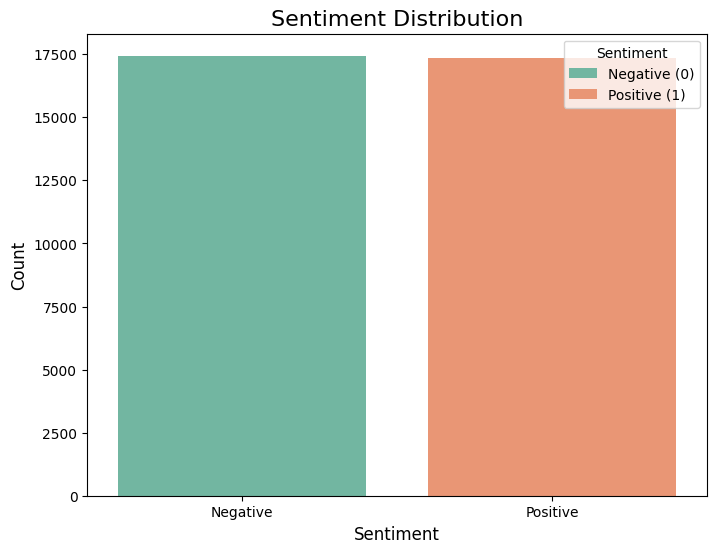

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_df, palette='Set2')

# Add labels and title
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add a legend to explain what 0 and 1 represent
plt.xticks([0, 1], ['Negative', 'Positive'])  # Label the x-axis ticks

# Create a custom legend
plt.legend(['Negative (0)', 'Positive (1)'], title="Sentiment", loc='upper right')

# Show the plot
plt.show()


The bar graph shows the equal distribution of negative and the positive reviews on the movie. And the data is balanced.

# Word Cloud

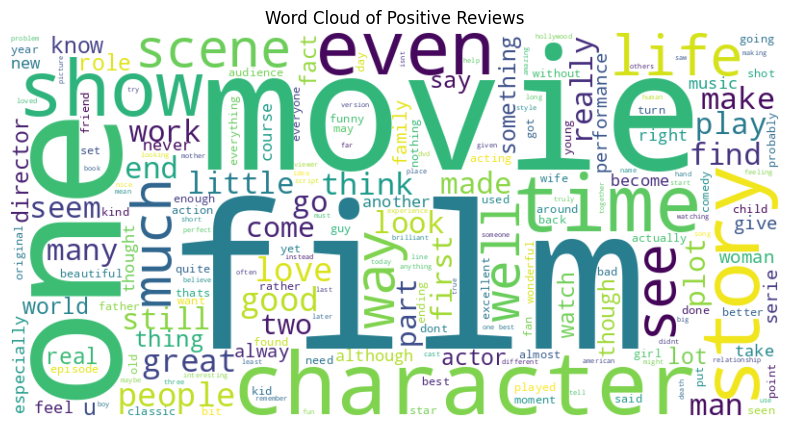

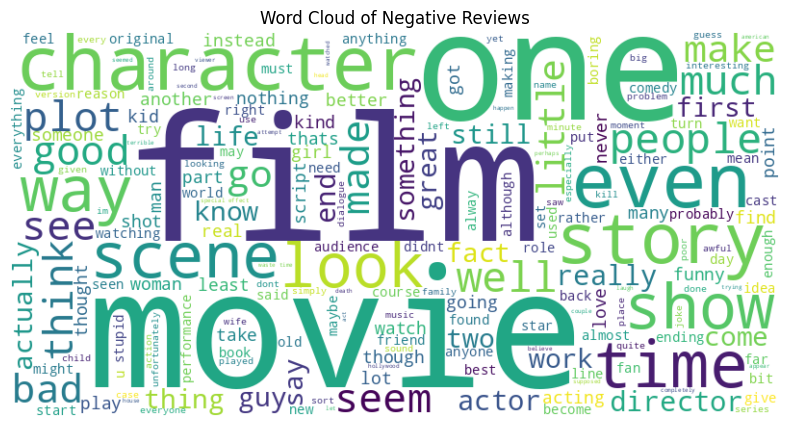

Top 20 Frequent Words in Positive Reviews:
 [('film', 33296), ('movie', 29946), ('one', 18960), ('like', 12107), ('time', 10559), ('good', 9958), ('story', 9548), ('character', 9462), ('great', 8905), ('see', 8804), ('well', 7929), ('get', 7754), ('make', 7601), ('really', 7477), ('also', 7442), ('would', 7113), ('scene', 6761), ('show', 6582), ('even', 6544), ('much', 6351)]
Top 20 Frequent Words in Negative Reviews:
 [('movie', 38718), ('film', 29359), ('one', 18166), ('like', 15525), ('even', 10462), ('good', 9958), ('time', 9854), ('bad', 9747), ('character', 9614), ('would', 9535), ('get', 9084), ('make', 8851), ('really', 8484), ('scene', 7776), ('see', 7585), ('story', 7365), ('dont', 7049), ('much', 6766), ('people', 6397), ('thing', 6373)]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Filter positive and negative reviews
positive_reviews = train_df[train_df['sentiment'] == 1]['cleaned_text']
negative_reviews = train_df[train_df['sentiment'] == 0]['cleaned_text']

# Join all positive and negative reviews into single strings
positive_words = ' '.join(positive_reviews)
negative_words = ' '.join(negative_reviews)

# Create word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

# Plot positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

# Plot negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews")
plt.show()

# Show top 20 frequent words for positive reviews
positive_word_freq = Counter(positive_words.split()).most_common(20)
print("Top 20 Frequent Words in Positive Reviews:\n", positive_word_freq)

# Show top 20 frequent words for negative reviews
negative_word_freq = Counter(negative_words.split()).most_common(20)
print("Top 20 Frequent Words in Negative Reviews:\n", negative_word_freq)

# N-Gram Analysis

<ipython-input-25-260dc0b95ac5>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(positive_ngram_words), y=list(positive_ngram_freq), palette='Set2')


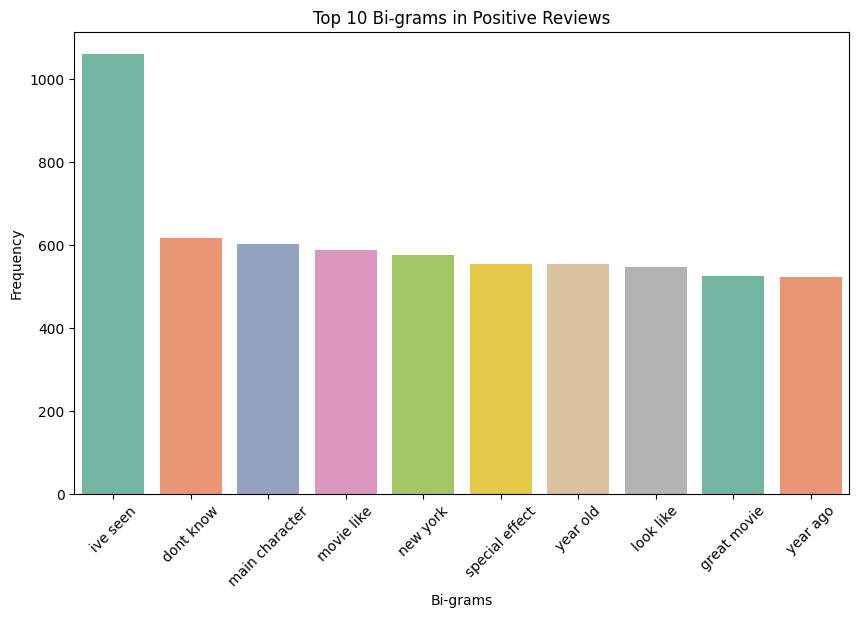

<ipython-input-25-260dc0b95ac5>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(negative_ngram_words), y=list(negative_ngram_freq), palette='Set1')


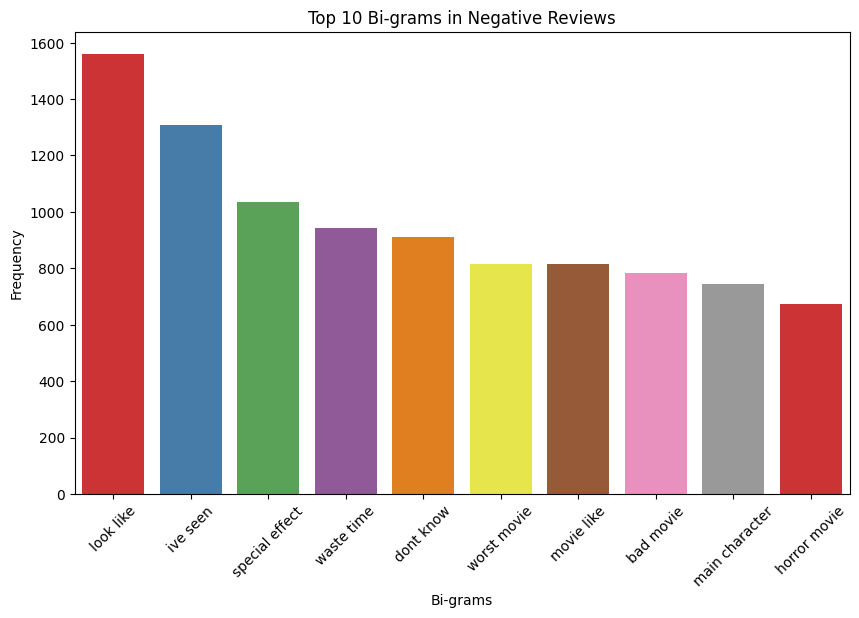

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Separate positive and negative reviews based on the sentiment column
positive_reviews = train_df[train_df['sentiment'] == 1]['cleaned_text']
negative_reviews = train_df[train_df['sentiment'] == 0]['cleaned_text']

# Function to generate n-grams (bi-grams, tri-grams, etc.)
def get_ngrams(text_series, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(text_series)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)
    return ngrams_freq

# Get n-grams for positive and negative reviews (bi-grams as an example)
positive_ngrams = get_ngrams(positive_reviews, n=2)  # Bi-grams
negative_ngrams = get_ngrams(negative_reviews, n=2)  # Bi-grams

# Plot the top 10 most frequent n-grams for positive reviews
top_positive_ngrams = positive_ngrams[:10]
positive_ngram_words, positive_ngram_freq = zip(*top_positive_ngrams)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(positive_ngram_words), y=list(positive_ngram_freq), palette='Set2')
plt.title("Top 10 Bi-grams in Positive Reviews")
plt.xticks(rotation=45)
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.show()

# Plot the top 10 most frequent n-grams for negative reviews
top_negative_ngrams = negative_ngrams[:10]
negative_ngram_words, negative_ngram_freq = zip(*top_negative_ngrams)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(negative_ngram_words), y=list(negative_ngram_freq), palette='Set1')
plt.title("Top 10 Bi-grams in Negative Reviews")
plt.xticks(rotation=45)
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.show()



#Train-Test Split


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [ ]:
# Training set
X_train = train_df['cleaned_text']
y_train = train_df['sentiment']

# Validation set
X_val = val_df['cleaned_text']
y_val = val_df['sentiment']

# Testing set
X_test = test_df['cleaned_text']
y_test = test_df['sentiment']

print("Training set distribution:")
print(y_train.value_counts())

print("\nValidation set distribution:")
print(y_val.value_counts())

print("\nTest set distribution:")
print(y_test.value_counts())

Training set distribution:
0    17441
1    17351
Name: sentiment, dtype: int64

Validation set distribution:
1    2545
0    2454
Name: sentiment, dtype: int64

Test set distribution:
1    5035
0    4943
Name: sentiment, dtype: int64


**Set Distribution bar graph across test,train and validation sets**

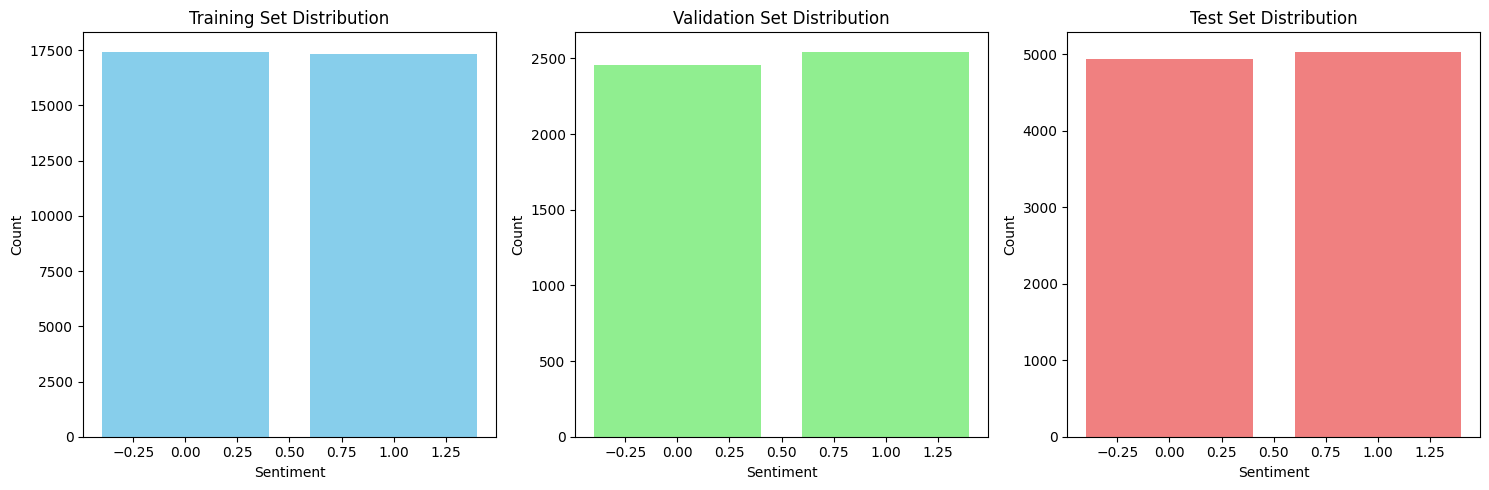

In [ ]:
import matplotlib.pyplot as plt

# Calculate the distribution of sentiment in each set
train_dist = y_train.value_counts()
val_dist = y_val.value_counts()
test_dist = y_test.value_counts()

# Plot the distributions as bar graphs
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Training set distribution
axes[0].bar(train_dist.index, train_dist.values, color='skyblue')
axes[0].set_title('Training Set Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Validation set distribution
axes[1].bar(val_dist.index, val_dist.values, color='lightgreen')
axes[1].set_title('Validation Set Distribution')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')

# Test set distribution
axes[2].bar(test_dist.index, test_dist.values, color='lightcoral')
axes[2].set_title('Test Set Distribution')
axes[2].set_xlabel('Sentiment')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


The positive and negative reviews across all the sets are balances and nearly balanced.

# Tokenization and Padding

1. In train set

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# 1. Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on the training data

# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

Maximum sequence length based on 95th percentile: 309
Shape of padded training data: (34792, 309)
Shape of padded validation data: (4999, 309)
Shape of padded testing data: (9978, 309)


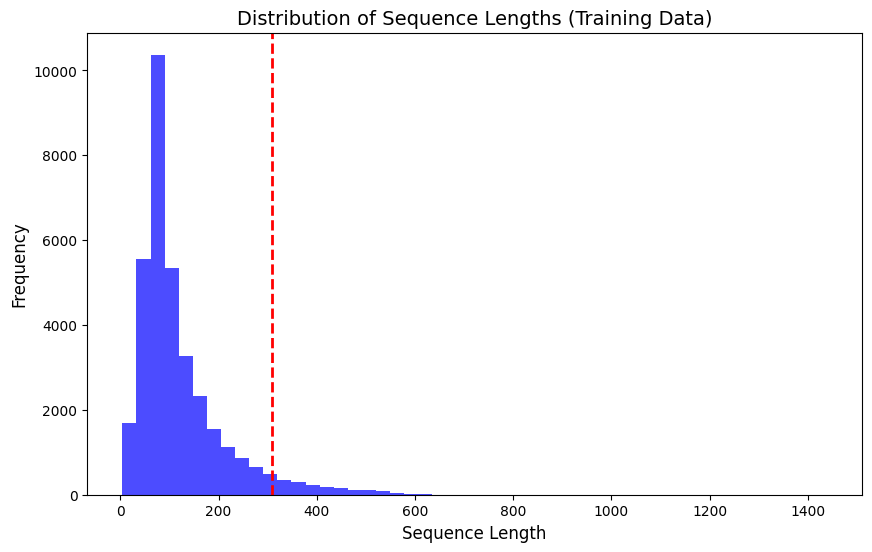

In [ ]:
# 2. Determine the maximum sequence length
max_sequence_length = int(np.percentile([len(seq) for seq in X_train_seq], 95))
print(f"Maximum sequence length based on 95th percentile: {max_sequence_length}")

# 3. Apply padding to ensure uniform sequence lengths
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post', truncating='post')

# 4. Check the shape of the padded sequences to ensure consistency
print("Shape of padded training data:", X_train_padded.shape)
print("Shape of padded validation data:", X_val_padded.shape)
print("Shape of padded testing data:", X_test_padded.shape)

# 5. Visualize the distribution of sequence lengths
sequence_lengths = [len(seq) for seq in X_train_seq]
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50, color='blue', alpha=0.7)
plt.axvline(max_sequence_length, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Sequence Lengths (Training Data)', fontsize=14)
plt.xlabel('Sequence Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#Model Building and Training:

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

vocab_size = len(tokenizer.word_index) + 1  # +1 for OOV
print(f"Vocabulary size: {vocab_size}")

embedding_dim = 128  # standard choice

Vocabulary size: 137151


##Model 1: Simple RNN with Trainable Embedding

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight

# Step 1: Build the Simple RNN model
model_rnn = Sequential()

# Embedding layer
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length))

# Simple RNN layer with more units and dropout
model_rnn.add(SimpleRNN(128))  # Increased number of units to 128
model_rnn.add(Dropout(0.4))  # dropout rate

# Output layer
model_rnn.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Step 2: Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Step 3: Class weights (if applicable for imbalance)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))


# Model2: LSTM

In [ ]:
#lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size,
                         output_dim=embedding_dim,
                         input_length=max_sequence_length))
model_lstm.add(LSTM(units=100, return_sequences=True))
model_lstm.add(Dropout(0.4))  # Dropout layer after LSTM layer
model_lstm.add(LSTM(units=100, return_sequences=False))
model_lstm.add(Dropout(0.4))  # Dropout layer after second LSTM layer
model_lstm.add(Dense(1, activation='sigmoid'))  # For binary classification

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model architecture
model_lstm.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 309, 128)          17555328  
                                                                 
 lstm (LSTM)                 (None, 309, 100)          91600     
                                                                 
 dropout_1 (Dropout)         (None, 309, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 17,727,429
Trainable params: 17,727,429


##Model 3: LSTM with Pretrained Word2Vec Embeddings:

In [ ]:
!pip install gensim==4.3.2

In [ ]:
!pip install --upgrade gensim

In [ ]:
!pip install --upgrade scipy

In [ ]:
import numpy as np
import gensim.downloader as api
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# load pre-trained Word2Vec embeddings
try:
    w2v = api.load('word2vec-google-news-300')
    print("Successfully loaded Word2Vec embeddings")
except Exception as e:
    print(f"Error loading embeddings: {e}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Successfully loaded Word2Vec embeddings


In [ ]:
# create embedding matrix
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    try:
        embedding_vector = w2v[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        pass  # word not in Word2Vec model

In [ ]:
#Model defination: LSTM+W2V
model_w2v = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=max_sequence_length,
              embeddings_initializer=Constant(embedding_matrix),
              mask_zero=True),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# freeze embedding layer
model_w2v.layers[0].trainable = False

model_w2v.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# compile the model
model_w2v.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 309, 300)          41145300  
                                                                 
 lstm_2 (LSTM)               (None, 64)                93440     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41,238,805
Trainable params: 93,505
Non-trainable params: 41,145,300
_________________________________________________________________


#Model Training and Evaluation:

**1. RNN MODEL TRAINING**

In [ ]:
import time

# Adjusted Training Parameters
epochs = 30  # Increased epochs
batch_size = 128  # Experiment with larger batch size

# Fine-Tune ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,  # Reduce learning rate by 30% (can experiment with this)
    patience=4,  # Increased patience to allow the model more time to converge
    min_lr=1e-6,
    verbose=1
)

# Callbacks with Gradient Clipping
callbacks_rnn = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,  # Allow more patience
        restore_best_weights=True
    ),
    ModelCheckpoint(
        'rnn_model_best.h5',
        monitor='val_loss',
        save_best_only=True
    ),
    lr_scheduler
]

# Start timer
start_time_rnn = time.time()

# Train the model with the validation set
history_rnn = model_rnn.fit(
    X_train_padded,
    y_train,
    validation_data=(X_val_padded, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks_rnn,
    verbose=1
)

# Calculate training time
training_time_rnn = time.time() - start_time_rnn

# Print training time
print(f"Training time for Simple RNN model: {training_time_rnn:.2f} seconds")


Epoch 1/30
272/272 [==============================] - 293s 1s/step - loss: 0.7298 - accuracy: 0.5020 - val_loss: 0.6956 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 2/30
272/272 [==============================] - 267s 979ms/step - loss: 0.7117 - accuracy: 0.4998 - val_loss: 0.6942 - val_accuracy: 0.4989 - lr: 0.0010
Epoch 3/30
272/272 [==============================] - 249s 917ms/step - loss: 0.7018 - accuracy: 0.5026 - val_loss: 0.6938 - val_accuracy: 0.4953 - lr: 0.0010
Epoch 4/30
272/272 [==============================] - 259s 951ms/step - loss: 0.6962 - accuracy: 0.5047 - val_loss: 0.6937 - val_accuracy: 0.5101 - lr: 0.0010
Epoch 5/30
272/272 [==============================] - 245s 901ms/step - loss: 0.6940 - accuracy: 0.5058 - val_loss: 0.6937 - val_accuracy: 0.5099 - lr: 0.0010
Epoch 6/30
272/272 [==============================] - 258s 949ms/step - loss: 0.6938 - accuracy: 0.5046 - val_loss: 0.6930 - val_accuracy: 0.5081 - lr: 0.0010
Epoch 7/30
272/272 [=============================

In [ ]:
rnn_test_loss, rnn_test_accuracy = model_rnn.evaluate(X_test_padded, y_test)
print("Performance evaluation of Simple RNN Architecture:\n")
print(f"Test Loss: {rnn_test_loss:.4f}, Test Accuracy: {rnn_test_accuracy:.4f}, Training Time: {training_time_rnn:.2f} seconds")

312/312 [==============================] - 12s 39ms/step - loss: 0.6935 - accuracy: 0.4992
Performance evaluation of Simple RNN Architecture:

Test Loss: 0.6935, Test Accuracy: 0.4992, Training Time: 2828.89 seconds


**2. LSTM Model Training**

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('model_lstm.h5', save_best_only=True),
    lr_scheduler
]

# train the model
start_time_lstm = time.time()
history_lstm = model_lstm.fit(
    X_train_padded, y_train,
    validation_data=(X_val_padded, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks
)
lstm_training_time = time.time() - start_time_lstm

# Display training time
print(f"Training Time (LSTM): {lstm_training_time:.2f} seconds")

Epoch 1/30
272/272 [==============================] - 698s 3s/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6930 - val_accuracy: 0.5091 - lr: 0.0010
Epoch 2/30
272/272 [==============================] - 706s 3s/step - loss: 0.6939 - accuracy: 0.5054 - val_loss: 0.6941 - val_accuracy: 0.4977 - lr: 0.0010
Epoch 3/30
272/272 [==============================] - 693s 3s/step - loss: 0.6753 - accuracy: 0.5223 - val_loss: 0.6981 - val_accuracy: 0.5027 - lr: 0.0010
Epoch 4/30
272/272 [==============================] - 733s 3s/step - loss: 0.6660 - accuracy: 0.5335 - val_loss: 0.7227 - val_accuracy: 0.5013 - lr: 0.0010
Training Time (LSTM): 2830.80 seconds


In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model_lstm.evaluate(X_test_padded, y_test, verbose=1)

# Print the results
print("Performance evaluation of LSTM\n")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

312/312 [==============================] - 69s 221ms/step - loss: 0.6933 - accuracy: 0.5046
Performance evaluation of LSTM

Test Loss: 0.6933
Test Accuracy: 0.5046


**3. LSTM with W2V Model training and evaluation**

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('model_lstm_w2v.h5', save_best_only=True),
    lr_scheduler
]

# Training time
start_time = time.time()

# Train the model
history_w2v = model_w2v.fit(
    X_train_padded,  # padded Word2Vec data
    y_train,
    validation_split=(X_val_padded, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks
)

train_time_lstm_w2v = time.time() - start_time

# Output the training time
print(f"Training Time for LSTM with Word2Vec: {train_time_lstm_w2v:.2f} seconds")

Epoch 1/30
218/218 [==============================] - 293s 1s/step - loss: 0.4431 - accuracy: 0.7946 - val_loss: 0.3647 - val_accuracy: 0.8415 - lr: 0.0010
Epoch 2/30
218/218 [==============================] - 268s 1s/step - loss: 0.3658 - accuracy: 0.8445 - val_loss: 0.3676 - val_accuracy: 0.8435 - lr: 0.0010
Epoch 3/30
218/218 [==============================] - 245s 1s/step - loss: 0.3354 - accuracy: 0.8600 - val_loss: 0.4350 - val_accuracy: 0.8332 - lr: 0.0010
Epoch 4/30
218/218 [==============================] - 295s 1s/step - loss: 0.3177 - accuracy: 0.8677 - val_loss: 0.3340 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 5/30
218/218 [==============================] - 299s 1s/step - loss: 0.3045 - accuracy: 0.8752 - val_loss: 0.3261 - val_accuracy: 0.8626 - lr: 0.0010
Epoch 6/30
218/218 [==============================] - 310s 1s/step - loss: 0.3015 - accuracy: 0.8776 - val_loss: 0.3156 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 7/30
218/218 [==============================] - 262s 1s/st

In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model_w2v.evaluate(X_test_padded, y_test, verbose=1)

# Print the results
print("Performance evaluation of LSTM + W2V:\n")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

312/312 [==============================] - 49s 156ms/step - loss: 0.2764 - accuracy: 0.8868
Performance evaluation of LSTM + W2V:

Test Loss: 0.2764
Test Accuracy: 0.8868


# Visualization of Evaluation

#1. Hist plot

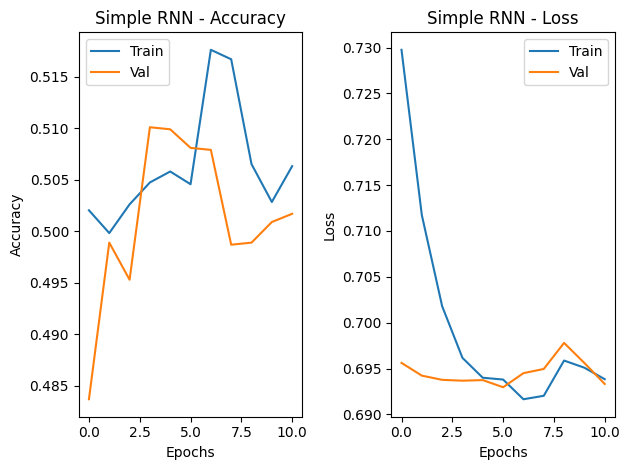

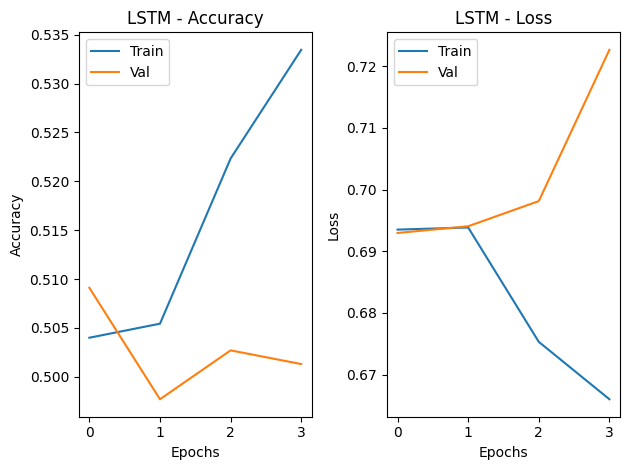

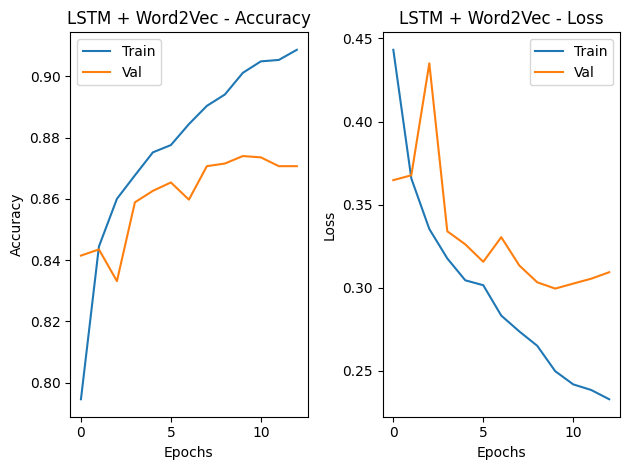

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plotting the history for each model
plot_history(history_rnn, "Simple RNN")
plot_history(history_lstm, "LSTM")
plot_history(history_w2v, "LSTM + Word2Vec")


# **Comparative Evaluation: (Model1, Model2 & Model3)**

In [ ]:
rnn_test_loss, rnn_test_accuracy = model_rnn.evaluate(X_test_padded, y_test)
print("Performance evaluation of Simple RNN Architecture:\n")
print(f"Test Loss: {rnn_test_loss:.4f}, Test Accuracy: {rnn_test_accuracy:.4f}")

# Evaluate on the test set
test_loss, test_accuracy = model_lstm.evaluate(X_test_padded, y_test, verbose=1)

# Print the results
print("Performance evaluation of LSTM\n")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Evaluate on the test set
test_loss, test_accuracy = model_w2v.evaluate(X_test_padded, y_test, verbose=1)

# Print the results
print("Performance evaluation of LSTM + W2V:\n")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

312/312 [==============================] - 13s 40ms/step - loss: 0.6935 - accuracy: 0.4992
Performance evaluation of Simple RNN Architecture:

Test Loss: 0.6935, Test Accuracy: 0.4992
312/312 [==============================] - 73s 233ms/step - loss: 0.6933 - accuracy: 0.5046
Performance evaluation of LSTM

Test Loss: 0.6933
Test Accuracy: 0.5046
312/312 [==============================] - 48s 154ms/step - loss: 0.2764 - accuracy: 0.8868
Performance evaluation of LSTM + W2V:

Test Loss: 0.2764
Test Accuracy: 0.8868


In [ ]:
print("Training Time for Different Models (in minutes):\n")

# Convert and print training times in minutes
print(f"Training time for Simple RNN model: {training_time_rnn / 60:.2f} minutes\n")

print(f"Training time for LSTM: {lstm_training_time / 60:.2f} minutes\n")

print(f"Training time for LSTM with Word2Vec: {train_time_lstm_w2v / 60:.2f} minutes\n")


Training Time for Different Models (in minutes):

Training time for Simple RNN model: 47.15 minutes

Training time for LSTM: 47.18 minutes

Training time for LSTM with Word2Vec: 62.48 minutes



#2. Confution Matrix with accuracy of each model


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Store predictions globally to reuse in confusion matrix cell
y_pred_rnn = (model_rnn.predict(X_test_padded) > 0.5).astype("int32")
y_pred_lstm = (model_lstm.predict(X_test_padded) > 0.5).astype("int32")
y_pred_w2v = (model_w2v.predict(X_test_padded) > 0.5).astype("int32")

# Evaluate RNN
rnn_loss, rnn_acc = model_rnn.evaluate(X_test_padded, y_test, verbose=0)
print(f"\nSimple RNN - Loss: {rnn_loss:.4f}, Accuracy: {rnn_acc:.4f}")
print("Classification Report - Simple RNN:\n")
print(classification_report(y_test, y_pred_rnn, target_names=["Class 0", "Class 1"]))

# Evaluate LSTM
lstm_loss, lstm_acc = model_lstm.evaluate(X_test_padded, y_test, verbose=0)
print(f"\nLSTM - Loss: {lstm_loss:.4f}, Accuracy: {lstm_acc:.4f}")
print("Classification Report - LSTM:\n")
print(classification_report(y_test, y_pred_lstm, target_names=["Class 0", "Class 1"]))

# Evaluate LSTM + Word2Vec
w2v_loss, w2v_acc = model_w2v.evaluate(X_test_padded, y_test, verbose=0)
print(f"\nLSTM + Word2Vec - Loss: {w2v_loss:.4f}, Accuracy: {w2v_acc:.4f}")
print("Classification Report - LSTM + Word2Vec:\n")
print(classification_report(y_test, y_pred_w2v, target_names=["Class 0", "Class 1"]))


312/312 [==============================] - 51s 156ms/step

Simple RNN - Loss: 0.6935, Accuracy: 0.4992
Classification Report - Simple RNN:

              precision    recall  f1-score   support

     Class 0       0.49      0.39      0.44      4943
     Class 1       0.50      0.61      0.55      5035

    accuracy                           0.50      9978
   macro avg       0.50      0.50      0.49      9978
weighted avg       0.50      0.50      0.49      9978


LSTM - Loss: 0.6933, Accuracy: 0.5046
Classification Report - LSTM:

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00      4943
     Class 1       0.50      1.00      0.67      5035

    accuracy                           0.50      9978
   macro avg       0.25      0.50      0.34      9978
weighted avg       0.25      0.50      0.34      9978



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



LSTM + Word2Vec - Loss: 0.2764, Accuracy: 0.8868
Classification Report - LSTM + Word2Vec:

              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.89      4943
     Class 1       0.88      0.89      0.89      5035

    accuracy                           0.89      9978
   macro avg       0.89      0.89      0.89      9978
weighted avg       0.89      0.89      0.89      9978



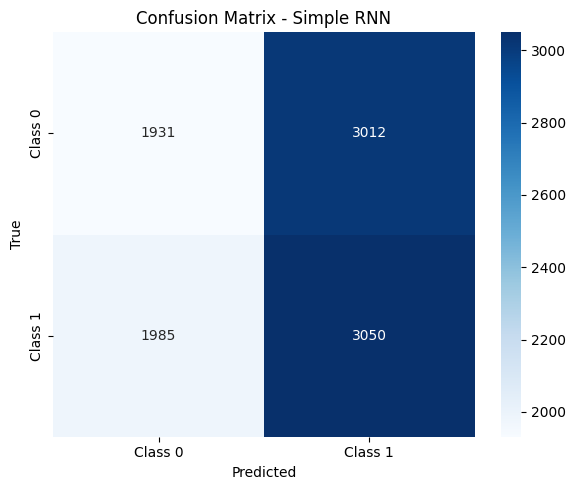

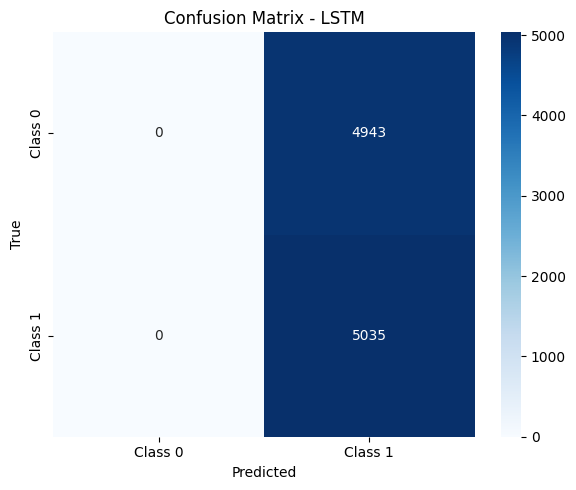

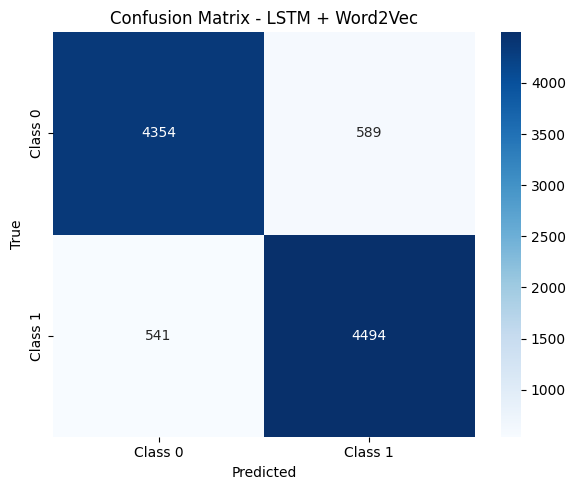

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot a confusion matrix
def plot_cm(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# Plot for all three models
plot_cm(y_test, y_pred_rnn, "Simple RNN")
plot_cm(y_test, y_pred_lstm, "LSTM")
plot_cm(y_test, y_pred_w2v, "LSTM + Word2Vec")


# UI with gradio


In [ ]:
! pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.8.2
    Uninstalling pydantic-1.8.2:
      Successfully uninstalled pydantic-1.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.0.16 requires pydantic!=

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Preprocessing function ---
def preprocess_review(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_sequence_length, padding='post', truncating='post')
    return padded

# --- Prediction function ---
def predict_sentiment(text):
    # Trim and validate input length
    cleaned_text = text.strip()
    if len(cleaned_text) < 4:
        return "⚠️ Please enter a longer and more descriptive review for accurate prediction."

    # Preprocess and predict
    padded_review = preprocess_review(cleaned_text)
    prob = model_w2v.predict(padded_review)[0][0]

    # Determine sentiment
    sentiment = "Positive 🎉" if prob >= 0.5 else "Negative 😞"
    confidence = prob if prob >= 0.5 else 1 - prob

    # Check for low confidence
    if 0.45 <= prob <= 0.55:
        return f"🤔 Sentiment: {sentiment} (Low Confidence: {confidence:.2f})\nTry writing a more detailed review."

    return f"✅ Sentiment: {sentiment} (Confidence: {confidence:.2f})"


# --- Gradio GUI ---
with gr.Blocks(css="""
    .gradio-container {
        font-family: 'Segoe UI', sans-serif;
        background-color: #f0f8ff;
        padding: 20px;
    }

    h1, h2, h3, p, .gr-markdown {
        color: #2c3e50 !important;
    }

    .input-box textarea {
        font-size: 16px;
        padding: 12px;
        border-radius: 8px;
    }

    .output-box {
        font-size: 18px;
        font-weight: bold;
        color: #333;
        padding: 10px;
        background-color: #e6f7ff;
        border-radius: 8px;
        min-height: 80px;
    }

    button {
        background-color: #4CAF50;
        color: white;
        font-weight: bold;
        border-radius: 8px;
        padding: 10px 20px;
        margin-top: 10px;
    }
""") as demo:

    # Title and Description
    gr.Markdown("## 🎬 Movie Review Sentiment Classifier (LSTM + Word2Vec)")
    gr.Markdown("Enter a movie review below and the model will classify its sentiment in real time using an LSTM network trained with Word2Vec embeddings.")

    # Input and Output Components
    with gr.Row():
        with gr.Column():
            review_input = gr.Textbox(
                lines=4,
                label="Your Review",
                placeholder="Type a movie review here...",
                elem_classes=["input-box"]
            )
            submit_btn = gr.Button("Analyze Sentiment 🎯")
        with gr.Column():
            result_output = gr.Textbox(
                label="Prediction",
                interactive=False,
                elem_classes=["output-box"]
            )

    # Connect Button to Prediction Function
    submit_btn.click(fn=predict_sentiment, inputs=review_input, outputs=result_output)

# Launch the Gradio App
demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b8791a4b4c21920749.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
